# Imports

In [1]:
%load_ext autoreload
%autoreload 2

from dataloader.load_regression_data_from_arbitrary_gp import RegressionDataGeneratorArbitraryGP

2023-02-19 16:02:58.612857: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-02-19 16:02:59.272777: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-02-19 16:02:59.272839: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-02-19 16:02:59.272846: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make su

# DataGenerator

In [2]:
data_generator = RegressionDataGeneratorArbitraryGP(
    iterations=250,
    batch_size=32,
    min_num_context=3,
    max_num_context=20,
    min_num_target=2,
    max_num_target=10,
    min_x_val_uniform=-2,
    max_x_val_uniform=2,
    kernel_length_scale=0.4
)

In [3]:
(context_x, context_y, target_x), target_y = next(iter(data_generator.train_ds))

(<Figure size 800x500 with 1 Axes>, <AxesSubplot: >)

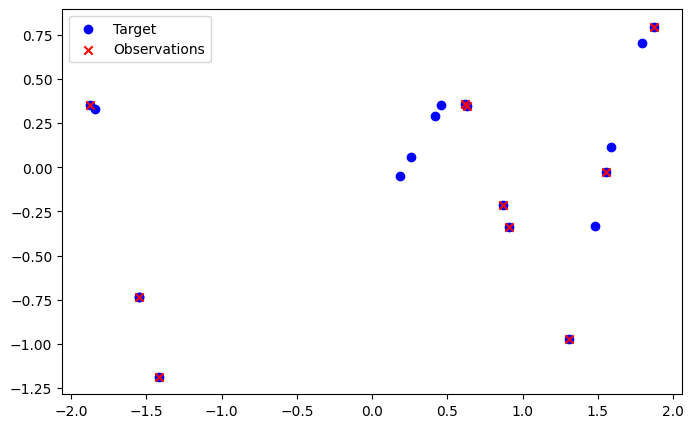

In [4]:
data_generator.plot_first_elt_of_random_batch()

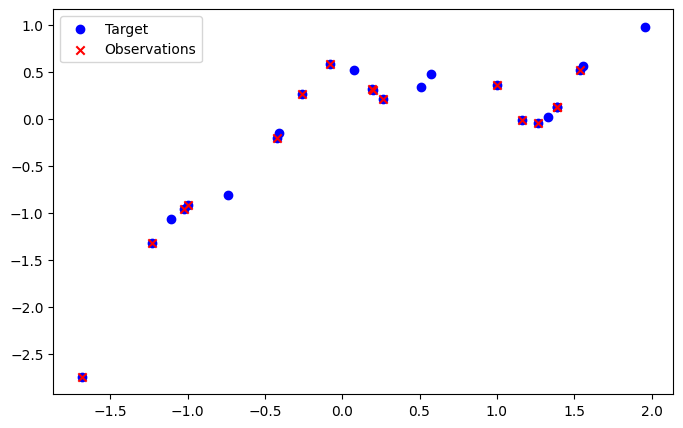

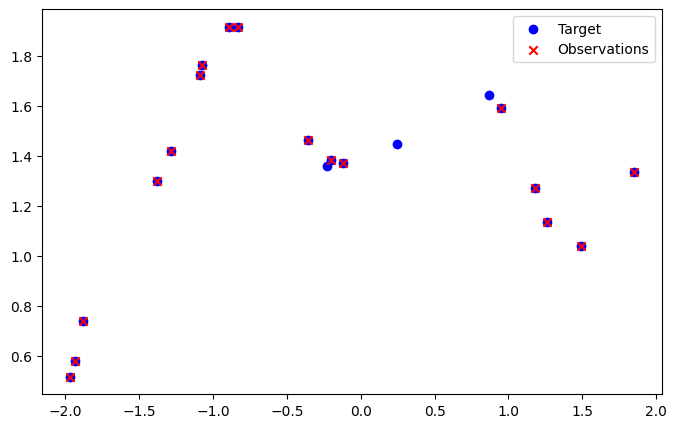

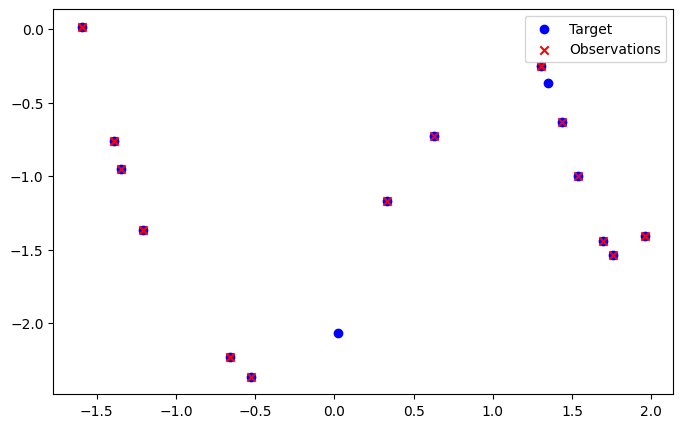

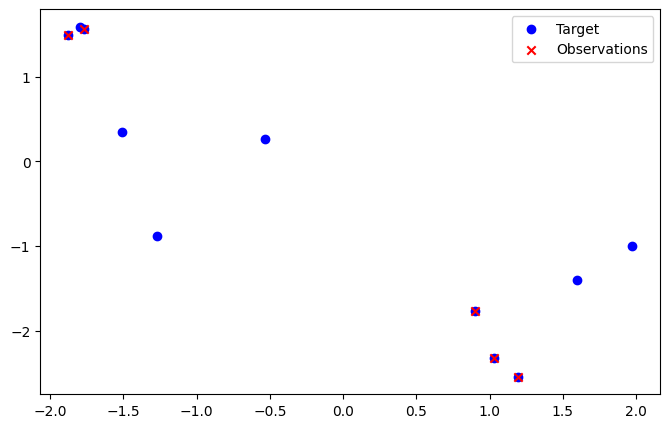

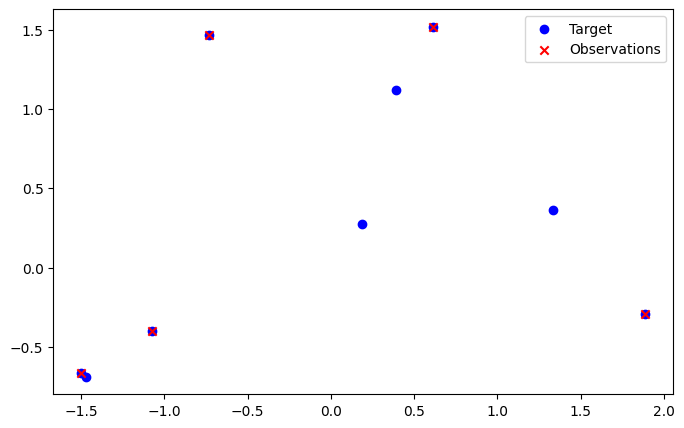

In [5]:
for (context_x, context_y, target_x), target_y in data_generator.train_ds.take(5):
    RegressionDataGeneratorArbitraryGP.plot_first_elt_of_batch(context_x, context_y, target_x, target_y)

In [6]:
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions
from model import ConditionalNeuralProcess

encoder_dims = [500, 500, 500, 500]
decoder_dims = [500, 500, 500, 2]

def loss(target_y, pred_y):
    # Get the distribution
    mu, sigma = tf.split(pred_y, num_or_size_splits=2, axis=-1)
    dist = tfd.MultivariateNormalDiag(loc=mu, scale_diag=sigma)
    return -dist.log_prob(target_y)

model = ConditionalNeuralProcess(encoder_dims, decoder_dims)
model.compile(loss=loss, optimizer='adam')

In [10]:
model.fit(data_generator.train_ds, validation_data=data_generator.test_ds, epochs=1)

250/250 [==============================] - 28s 112ms/step - loss: 0.4762 - val_loss: 0.7269


In [11]:
from utils.gaussian_processes.plot_gp_utils import plot_preds_from_ds_test

1/1 [==============================] - 0s 30ms/step


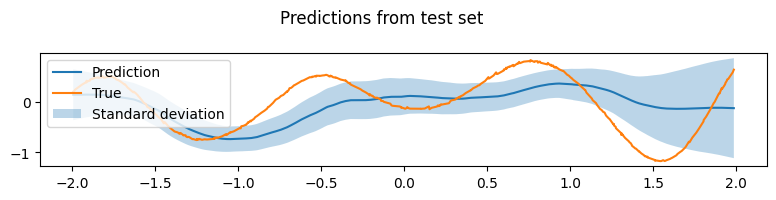

In [12]:
fig = plot_preds_from_ds_test(model, ds_test=data_generator.test_ds, num_samples=1)

1/1 [==============================] - 0s 28ms/step


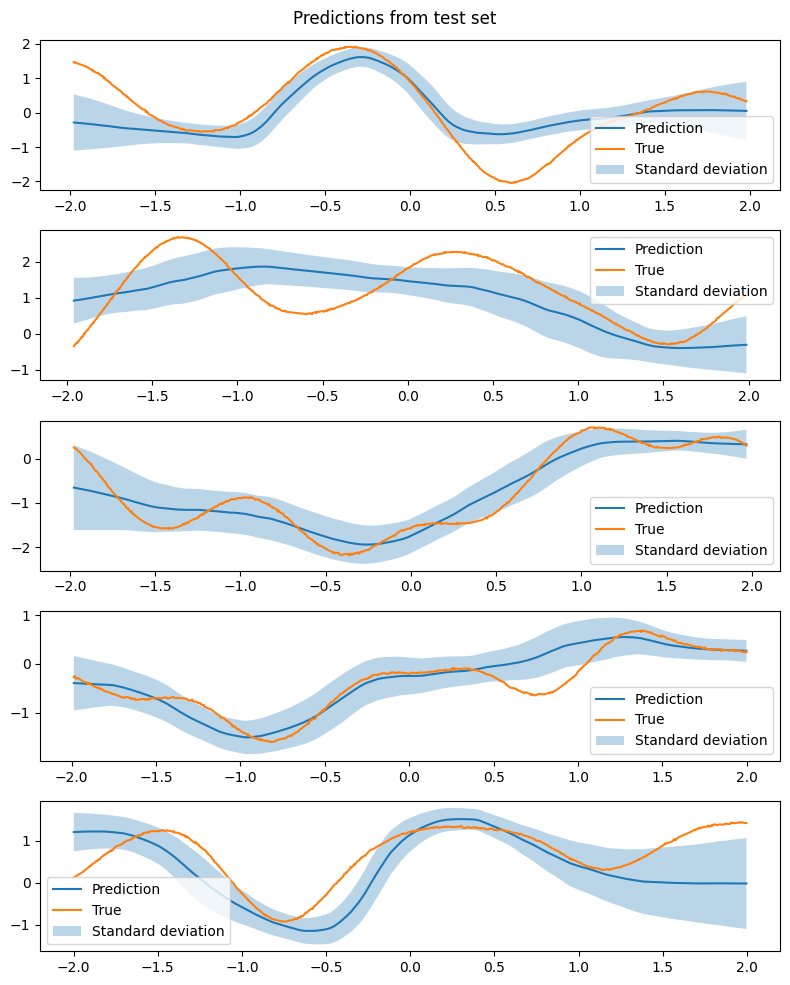

In [13]:
fig = plot_preds_from_ds_test(model, ds_test=data_generator.test_ds, num_samples=5)